In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


import os
import warnings

warnings.filterwarnings('ignore')

In [301]:
data=pd.read_csv('data\Expresso_churn_dataset.csv')

In [307]:
data['REGION'].value_counts()

REGION
DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: count, dtype: int64

In [146]:
df=pd.read_csv('data\Expresso_churn_dataset.csv')

In [147]:
df.drop('user_id',axis=1, inplace=True)

In [148]:
(df.isnull().sum()/df.shape[0])*100

REGION            39.428044
TENURE             0.000000
MONTANT           35.131018
FREQUENCE_RECH    35.131018
REVENUE           33.706213
ARPU_SEGMENT      33.706213
FREQUENCE         33.706213
DATA_VOLUME       49.229776
ON_NET            36.520774
ORANGE            41.561191
TIGO              59.887988
ZONE1             92.120835
ZONE2             93.648052
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.902223
FREQ_TOP_PACK     41.902223
CHURN              0.000000
dtype: float64

In [149]:
df.drop(['ZONE1','ZONE2'],axis=1,inplace=True)

In [150]:
df=df.dropna()
df.drop('MRG',axis=1,inplace=True)

In [151]:
df.info

<bound method DataFrame.info of           REGION        TENURE  MONTANT  FREQUENCE_RECH  REVENUE  \
0         FATICK  K > 24 month   4250.0            15.0   4251.0   
3          DAKAR  K > 24 month  13500.0            15.0  13502.0   
7          DAKAR  K > 24 month   7000.0            16.0   7229.0   
11       KAOLACK  K > 24 month  12650.0            27.0  11870.0   
18         DAKAR  K > 24 month   7600.0            46.0   7875.0   
...          ...           ...      ...             ...      ...   
2154020    DAKAR  K > 24 month  11000.0            25.0  10882.0   
2154023    LOUGA  K > 24 month   7250.0            25.0   7062.0   
2154030    DAKAR  K > 24 month   5600.0            15.0   6035.0   
2154037    THIES  K > 24 month    900.0             4.0    686.0   
2154044    THIES  K > 24 month   6100.0            15.0   5800.0   

         ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  ORANGE   TIGO  \
0              1417.0       17.0          4.0   388.0    46.0    1.0   
3      

In [152]:
df['TOP_PACK'].value_counts().sort_values(ascending=True)[0:20]

TOP_PACK
EVC_Jokko_Weekly                     1
Go-NetPro-4 Go                       1
EVC_700Mo                            1
CVM_On-net 400f=2200F                1
EVC_MEGA10000F                       1
Data_EVC_2Go24H                      1
1500=Unlimited7Day                   1
EVC_1Go                              1
APANews_weekly                       1
NEW_CLIR_PERMANENT_LIBERTE_MOBILE    2
CVM_500f=2GB                         2
305155009                            2
CVM_100f=200 MB                      2
FNF_Youth_ESN                        2
EVC_4900=12000F                      2
CVM_100F_unlimited                   2
VAS(IVR_Radio_Weekly)                3
pack_chinguitel_24h                  3
EVC_JOKKO30                          4
Internat: 1000F_Zone_3;24h\t\t       6
Name: count, dtype: int64

In [153]:
value_counts=df['TOP_PACK'].value_counts()
df = df[df['TOP_PACK'].isin(value_counts[value_counts > 100].index)]

In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [155]:
le.fit(df['TOP_PACK'])

LabelEncoder()

In [156]:
df['TOP_PACK']=le.transform(df['TOP_PACK'])

In [157]:
df['TOP_PACK']

0          39
3          13
7           7
11         39
18         10
           ..
2154020    37
2154023    37
2154030    21
2154037    39
2154044    11
Name: TOP_PACK, Length: 436372, dtype: int64

In [158]:
le.classes_

array(['200=Unlimited1Day', 'All-net 1000=5000;5d',
       'All-net 1000F=(3000F On+3000F Off);5d', 'All-net 300=600;2d',
       'All-net 5000= 20000off+20000on;30d',
       'All-net 500F =2000F_AllNet_Unlimited',
       'All-net 500F=1250F_AllNet_1250_Onnet;48h',
       'All-net 500F=2000F;5d', 'All-net 600F= 3000F ;5d',
       'CVM_on-net bundle 500=5000', 'Data: 100 F=40MB,24H',
       'Data: 200 F=100MB,24H', 'Data:1000F=2GB,30d', 'Data:1000F=5GB,7d',
       'Data:1500F=3GB,30D', 'Data:1500F=SPPackage1,30d',
       'Data:150F=SPPackage1,24H', 'Data:200F=Unlimited,24H',
       'Data:3000F=10GB,30d', 'Data:300F=100MB,2d', 'Data:30Go_V 30_Days',
       'Data:490F=1GB,7d', 'Data:500F=2GB,24H', 'Data:50F=30MB_24H',
       'Data:700F=1.5GB,7d', 'Data:DailyCycle_Pilot_1.5GB',
       'Facebook_MIX_2D', 'IVR Echat_Daily_50F', 'Jokko_Daily',
       'Jokko_Monthly', 'Jokko_promo',
       'MIXT: 200mnoff net _unl on net _5Go;30d',
       'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
       'MIXT:

In [159]:
df['REGION'].value_counts()

REGION
DAKAR          204222
THIES           66853
KAOLACK         33990
SAINT-LOUIS     33441
LOUGA           29261
DIOURBEL        18468
KAFFRINE        11926
TAMBACOUNDA     10889
FATICK          10750
KOLDA            6740
ZIGUINCHOR       5742
MATAM            3248
SEDHIOU           631
KEDOUGOU          211
Name: count, dtype: int64

In [160]:
from sklearn.preprocessing import OneHotEncoder

In [161]:
Ohe=OneHotEncoder(sparse_output=True)

In [162]:
df0=Ohe.fit_transform(df[['REGION']])

In [163]:
df0

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 436372 stored elements and shape (436372, 14)>

In [164]:
df1 = pd.DataFrame(df0.toarray(), columns=Ohe.get_feature_names_out(['REGION']))

In [165]:
df1.shape

(436372, 14)

In [166]:
df1.head()

,REGION_DAKAR,REGION_DIOURBEL,REGION_FATICK,REGION_KAFFRINE,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
df.shape

(436372, 15)

In [168]:
df1=df1.reset_index()

In [169]:
df=df.reset_index()

In [170]:
df=pd.concat([df, df1],axis=1)

In [171]:
df

,index,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,...,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,0,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,DAKAR,K > 24 month,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,KAOLACK,K > 24 month,12650.0,27.0,11870.0,3957.0,36.0,8453.0,431.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18,DAKAR,K > 24 month,7600.0,46.0,7875.0,2625.0,57.0,901.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436367,2154020,DAKAR,K > 24 month,11000.0,25.0,10882.0,3627.0,28.0,32955.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436368,2154023,LOUGA,K > 24 month,7250.0,25.0,7062.0,2354.0,25.0,609.0,1524.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
436369,2154030,DAKAR,K > 24 month,5600.0,15.0,6035.0,2012.0,24.0,7388.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436370,2154037,THIES,K > 24 month,900.0,4.0,686.0,229.0,5.0,0.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [172]:
df.columns

Index(['index', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN', 'index',
       'REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE',
       'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_LOUGA',
       'REGION_MATAM', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU',
       'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR'],
      dtype='object')

In [173]:
df['TENURE'].value_counts()

TENURE
K > 24 month     417905
I 18-21 month      7426
H 15-18 month      4225
J 21-24 month      2511
G 12-15 month      2262
F 9-12 month       1628
E 6-9 month         329
D 3-6 month          86
Name: count, dtype: int64

In [174]:
le2=LabelEncoder()
le2.fit(df['TENURE'])
df['TENURE']=le2.transform(df['TENURE'])

In [300]:
le2.classes_

array(['D 3-6 month', 'E 6-9 month', 'F 9-12 month', 'G 12-15 month',
       'H 15-18 month', 'I 18-21 month', 'J 21-24 month', 'K > 24 month'],
      dtype=object)

In [175]:
df['TENURE']

0         7
1         7
2         7
3         7
4         7
         ..
436367    7
436368    7
436369    7
436370    7
436371    7
Name: TENURE, Length: 436372, dtype: int64

In [176]:
df.head()

,index,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,...,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,0,FATICK,7,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,DAKAR,7,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,DAKAR,7,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,KAOLACK,7,12650.0,27.0,11870.0,3957.0,36.0,8453.0,431.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18,DAKAR,7,7600.0,46.0,7875.0,2625.0,57.0,901.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

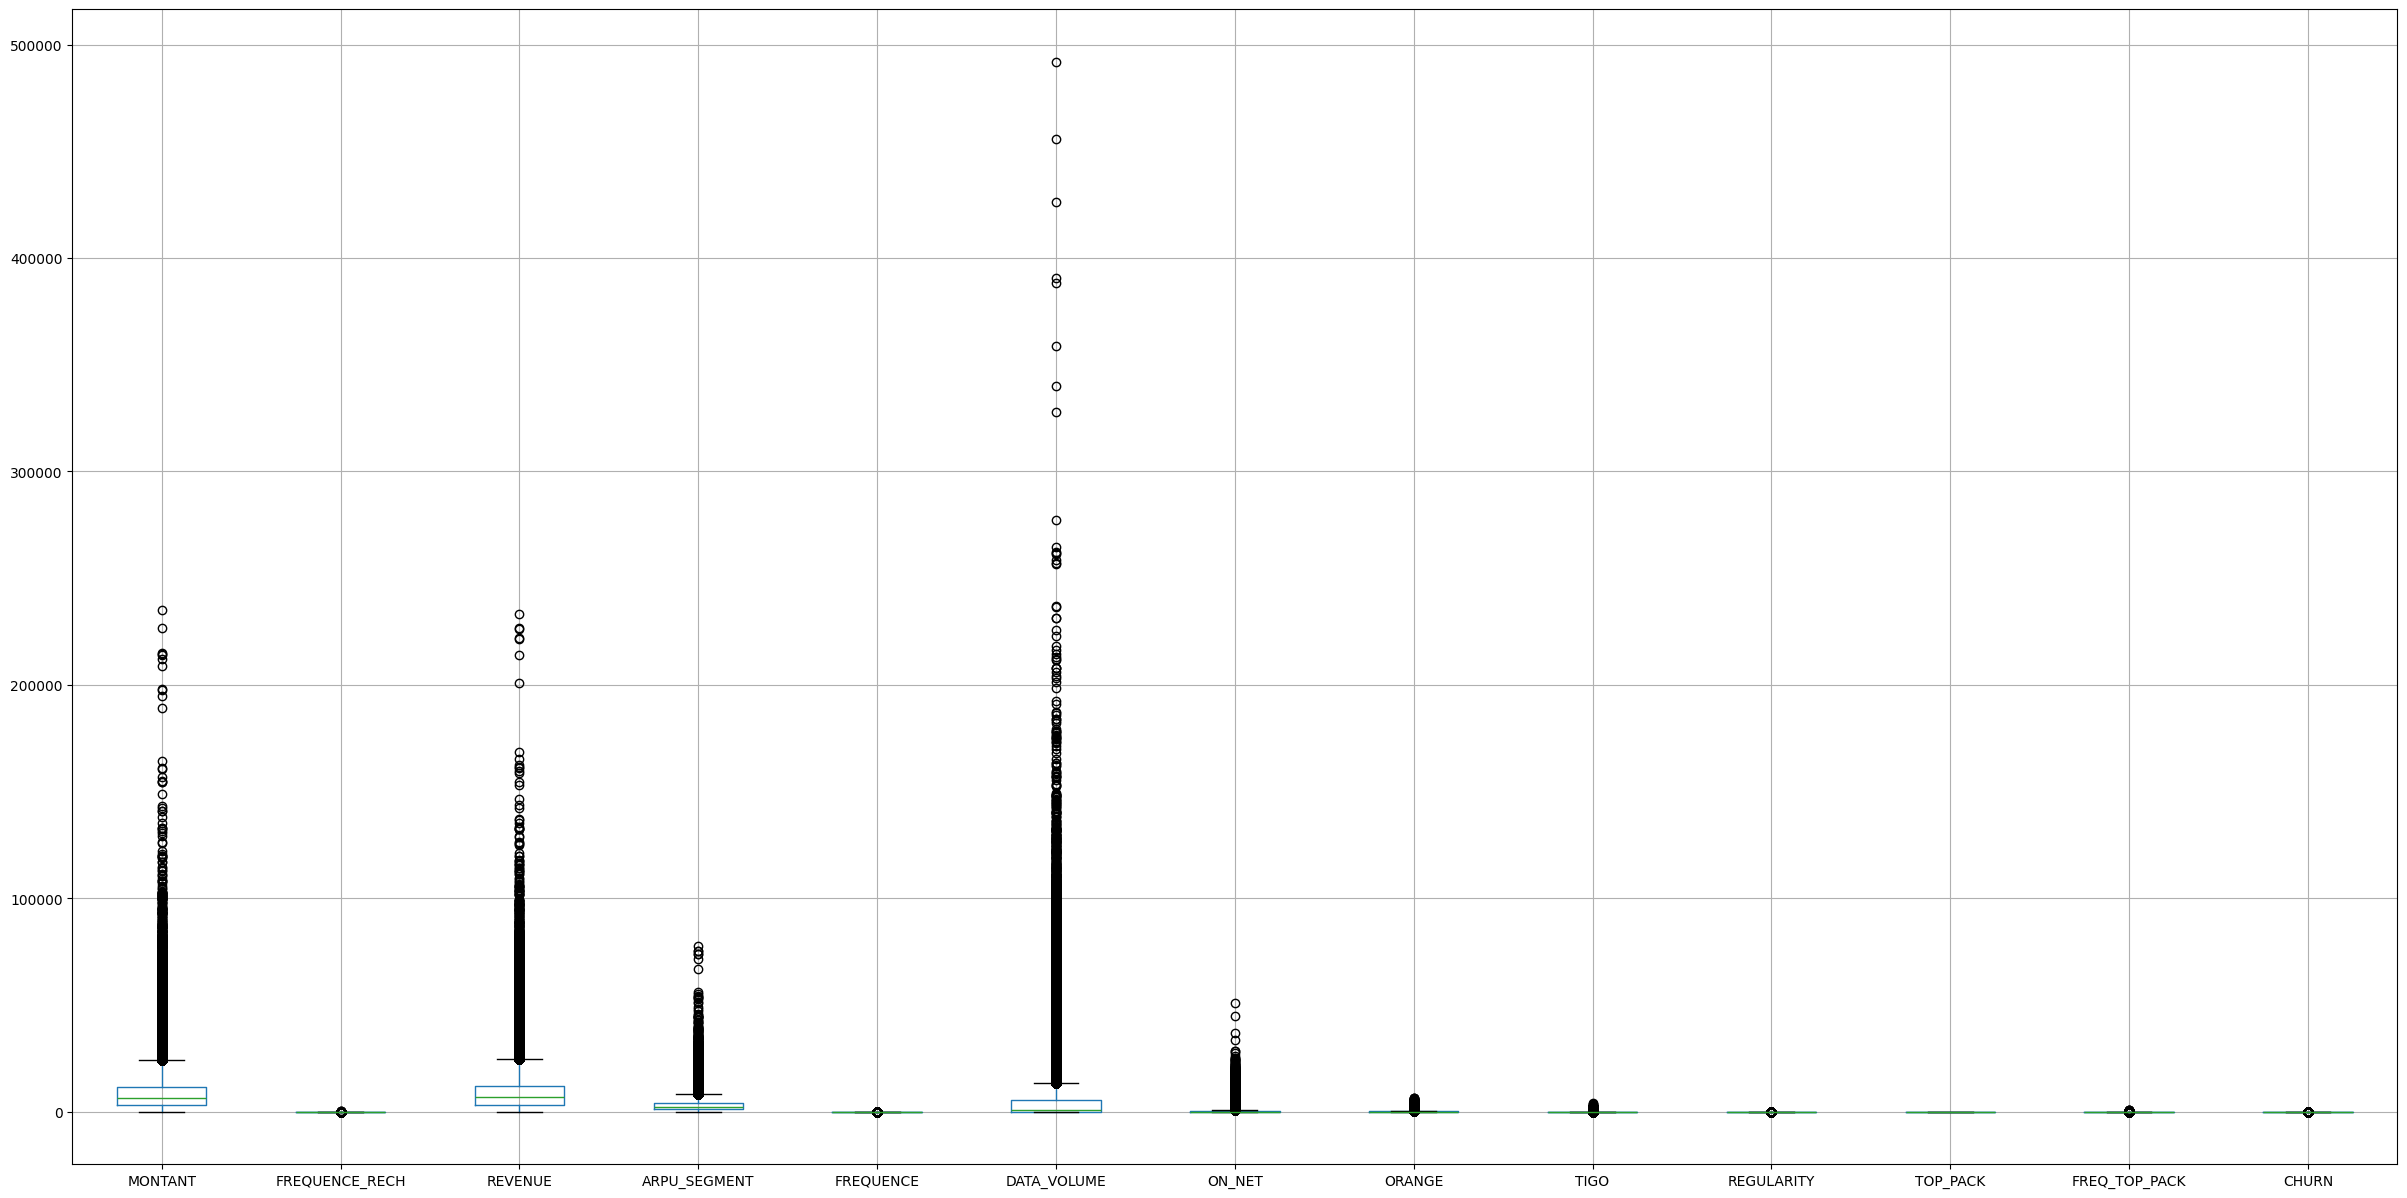

In [136]:
columns=[  'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN']

plt.figure(figsize=(30,15))

df[['MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN']].boxplot()
    

{'whiskers': [<matplotlib.lines.Line2D at 0x17d3303ad20>,
 'caps': [<matplotlib.lines.Line2D at 0x17d3303b2f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d3303aa50>],
 'medians': [<matplotlib.lines.Line2D at 0x17d3303b860>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d3303bb00>],
 'means': []}

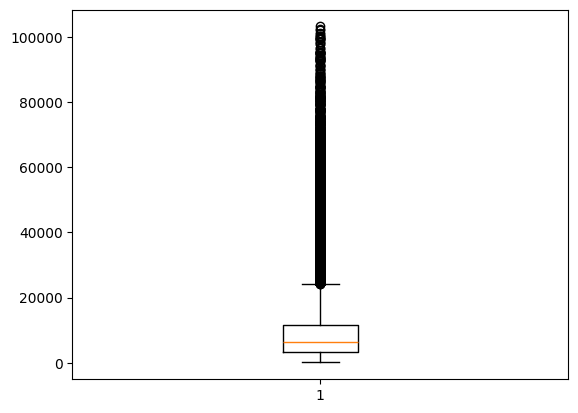

In [199]:
plt.boxplot(df['MONTANT'])

In [196]:
df=df[df['MONTANT']<105000]

In [197]:
df.shape

(436245, 31)

{'whiskers': [<matplotlib.lines.Line2D at 0x17dcdcdcb60>,
 'caps': [<matplotlib.lines.Line2D at 0x17dcdcdd070>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d608edcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x17dcdcdd550>],
 'fliers': [<matplotlib.lines.Line2D at 0x17dcdcdd7c0>],
 'means': []}

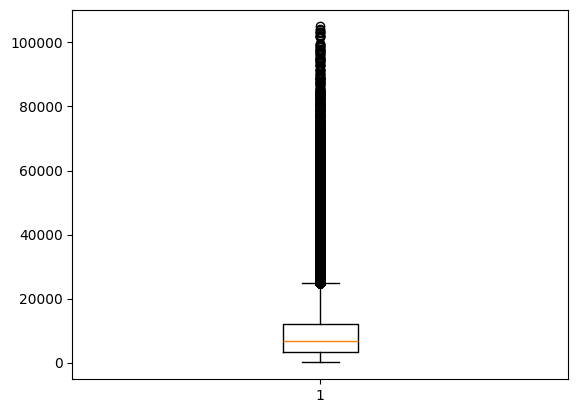

In [200]:
plt.boxplot(df['REVENUE'])

In [201]:
df=df[df['REVENUE']<100000]

In [202]:
df.shape

(436233, 31)

{'whiskers': [<matplotlib.lines.Line2D at 0x17dcdcaa480>,
 'caps': [<matplotlib.lines.Line2D at 0x17dcdcaa9c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17dcdcaa1e0>],
 'medians': [<matplotlib.lines.Line2D at 0x17dcdcaafc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17dcdcab2c0>],
 'means': []}

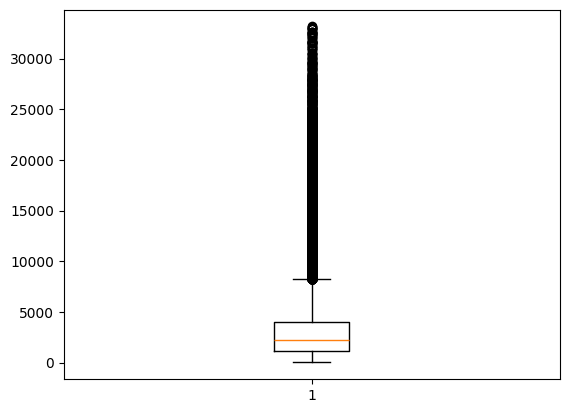

In [203]:
plt.boxplot(df['ARPU_SEGMENT'])

In [184]:
df=df[df['ARPU_SEGMENT']<35000]


In [185]:
df.shape

(436308, 31)

{'whiskers': [<matplotlib.lines.Line2D at 0x17dcdc290a0>,
 'caps': [<matplotlib.lines.Line2D at 0x17dcdc295e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17dcdc28da0>],
 'medians': [<matplotlib.lines.Line2D at 0x17dcdc29b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x17dcdc29e20>],
 'means': []}

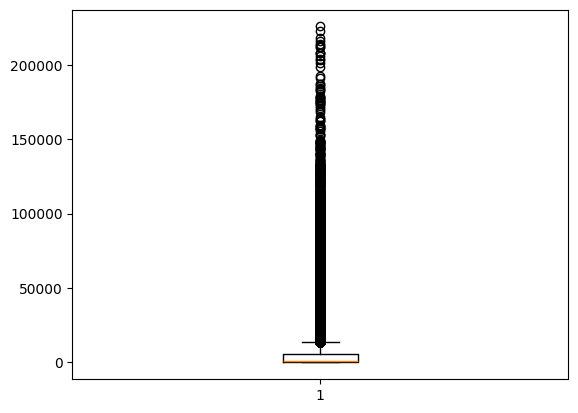

In [204]:
plt.boxplot(df['DATA_VOLUME'])

In [205]:
df=df[df['DATA_VOLUME']<150000]

In [206]:
df.shape

(436173, 31)

{'whiskers': [<matplotlib.lines.Line2D at 0x17d6af5ab40>,
 'caps': [<matplotlib.lines.Line2D at 0x17d81c94050>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d6af2e2a0>],
 'medians': [<matplotlib.lines.Line2D at 0x17d81c945c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d81c94890>],
 'means': []}

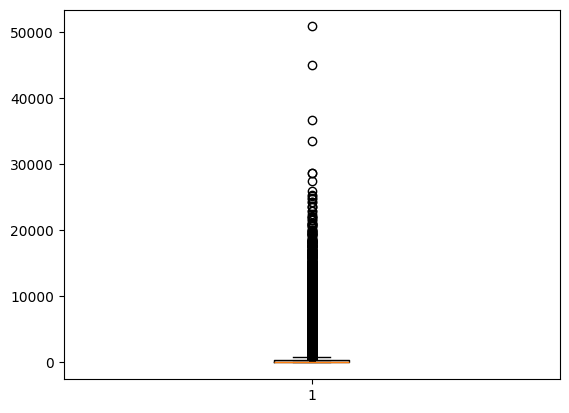

In [189]:
plt.boxplot(df['ON_NET'])

In [192]:
df=df[df['ON_NET']<20000]

In [193]:
df.shape

(436252, 31)

<Axes: >

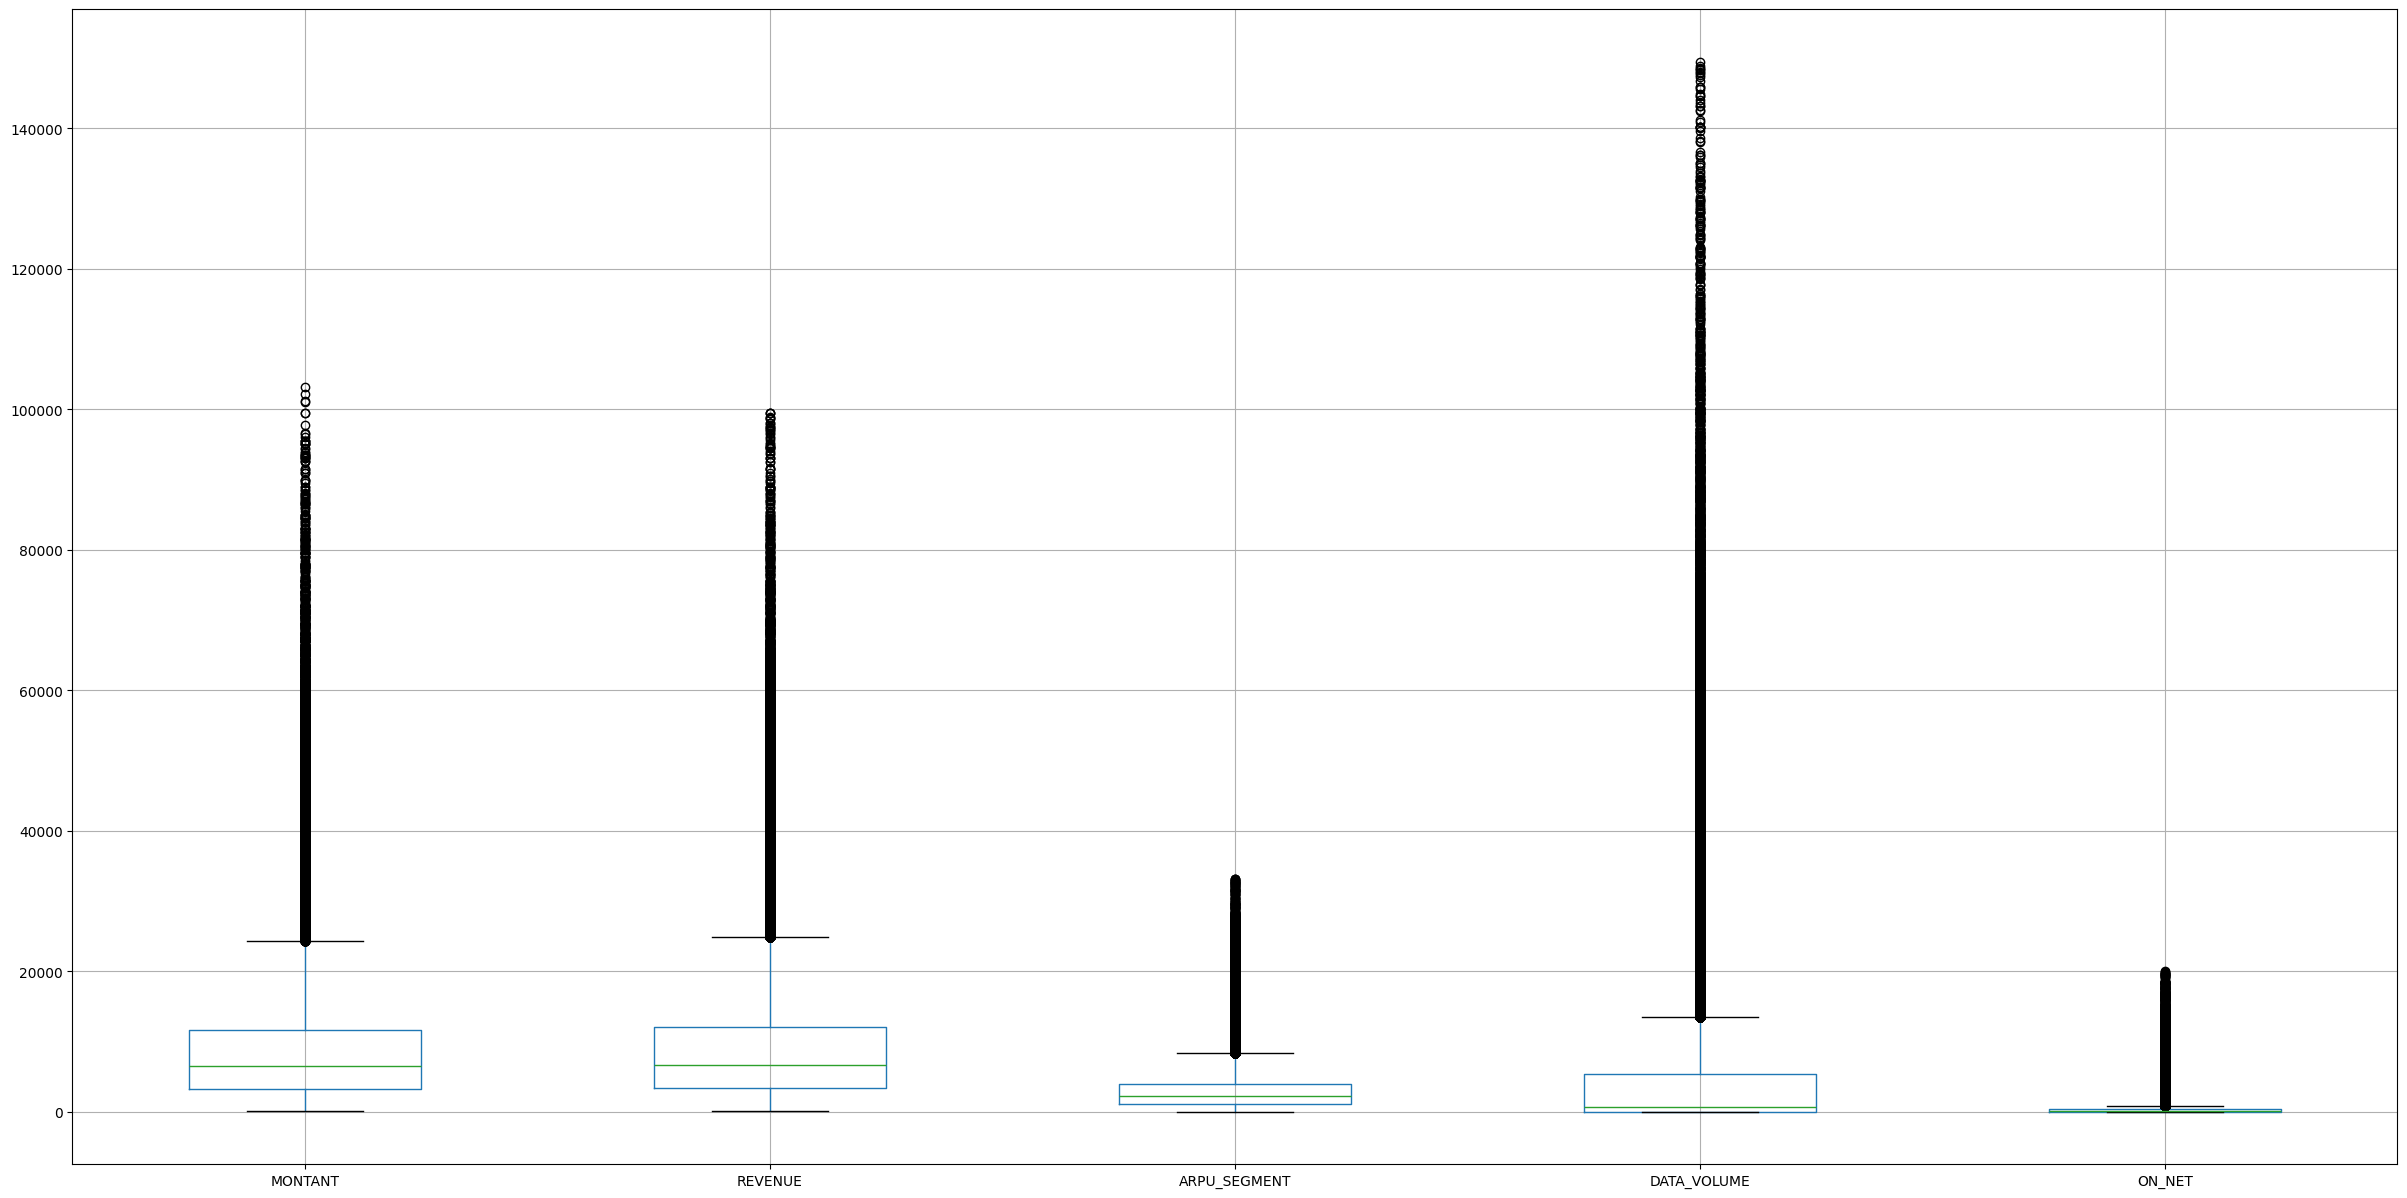

In [207]:
plt.figure(figsize=(30,15))

df[['MONTANT', 'REVENUE',
       'ARPU_SEGMENT', 'DATA_VOLUME', 'ON_NET']].boxplot()

In [208]:
df.columns


Index(['index', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN', 'index',
       'REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE',
       'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_LOUGA',
       'REGION_MATAM', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU',
       'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR'],
      dtype='object')

In [240]:
df.drop_duplicates(ignore_index=True, keep='first')

,index,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,...,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,0,FATICK,7,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,DAKAR,7,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,DAKAR,7,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,KAOLACK,7,12650.0,27.0,11870.0,3957.0,36.0,8453.0,431.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18,DAKAR,7,7600.0,46.0,7875.0,2625.0,57.0,901.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436168,2154020,DAKAR,7,11000.0,25.0,10882.0,3627.0,28.0,32955.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436169,2154023,LOUGA,7,7250.0,25.0,7062.0,2354.0,25.0,609.0,1524.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
436170,2154030,DAKAR,7,5600.0,15.0,6035.0,2012.0,24.0,7388.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436171,2154037,THIES,7,900.0,4.0,686.0,229.0,5.0,0.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [241]:
df['CHURN'].value_counts()

CHURN
0    435009
1      1164
Name: count, dtype: int64

In [242]:
from sklearn.utils import resample

In [243]:
df_major=df[df['CHURN']==0]
df_minor=df[df['CHURN']==1]

In [273]:
df_undersampled = resample(df_major, 
                                    replace=False,    # sample without replacement
                                    n_samples=(len(df_minor)*10), # to match minority class
                                    random_state=123) # reproducible results

In [274]:
df_balanced = pd.concat([df_undersampled, df_minor])

In [275]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [276]:
df_balanced

,index,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,...,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,1323296,DAKAR,7,13200.0,38.0,13193.0,4398.0,37.0,12352.0,170.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2060735,DAKAR,7,6400.0,45.0,6600.0,2200.0,46.0,5584.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1834278,DAKAR,7,6450.0,8.0,7461.0,2487.0,9.0,21141.0,189.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,199945,DAKAR,7,3000.0,4.0,3000.0,1000.0,4.0,0.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1656463,DAKAR,7,23300.0,44.0,24495.0,8165.0,48.0,24115.0,972.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12799,558413,FATICK,7,8800.0,20.0,8802.0,2934.0,26.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12800,553405,DAKAR,7,12900.0,26.0,12901.0,4300.0,34.0,25287.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12801,48609,DAKAR,7,8350.0,17.0,8089.0,2696.0,24.0,9665.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12802,1799402,DAKAR,7,1500.0,3.0,1500.0,500.0,2.0,238.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [308]:
df_balanced['CHURN'].value_counts()

CHURN
0    11640
1     1164
Name: count, dtype: int64

In [209]:
X = df.drop(['index','REGION','CHURN'], axis=1)

y = df['CHURN']

In [278]:
X1 = df_balanced.drop(['index','REGION','CHURN'], axis=1)

y1 = df_balanced['CHURN']

In [280]:
y1.value_counts()

CHURN
0    11640
1     1164
Name: count, dtype: int64

In [281]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from collections import Counter

In [282]:
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X1, y1)
print(sorted(Counter(y_resampled).items()))

[(0, 11640), (1, 11579)]


In [298]:
X1.columns

Index(['TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY',
       'TOP_PACK', 'FREQ_TOP_PACK', 'REGION_DAKAR', 'REGION_DIOURBEL',
       'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU',
       'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_SAINT-LOUIS',
       'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES',
       'REGION_ZIGUINCHOR'],
      dtype='object')

In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [283]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state = 50)

In [284]:
X_train1.shape, X_test1.shape

((17414, 27), (5805, 27))

In [213]:
X_train.dtypes

TENURE                  int64
MONTANT               float64
FREQUENCE_RECH        float64
REVENUE               float64
ARPU_SEGMENT          float64
FREQUENCE             float64
DATA_VOLUME           float64
ON_NET                float64
ORANGE                float64
TIGO                  float64
REGULARITY              int64
TOP_PACK                int64
FREQ_TOP_PACK         float64
REGION_DAKAR          float64
REGION_DIOURBEL       float64
REGION_FATICK         float64
REGION_KAFFRINE       float64
REGION_KAOLACK        float64
REGION_KEDOUGOU       float64
REGION_KOLDA          float64
REGION_LOUGA          float64
REGION_MATAM          float64
REGION_SAINT-LOUIS    float64
REGION_SEDHIOU        float64
REGION_TAMBACOUNDA    float64
REGION_THIES          float64
REGION_ZIGUINCHOR     float64
dtype: object

In [214]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [216]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10, 25, 30,40],
    'min_samples_split': [2,5,10],
    'n_estimators' : [10,50,100]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score achieved: ", grid_search.best_score_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best score achieved:  0.997364953905284


In [288]:
param_grid1 = {
    'criterion': ['gini'],
    'max_depth': [20],
    'min_samples_split': [2],
    'n_estimators' : [150,200]
}


grid_search1 = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid1, cv=5, scoring='recall')
grid_search1.fit(X_train1, y_train1)

print("Best parameters found: ", grid_search1.best_params_)
print("Best score achieved: ", grid_search1.best_score_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best score achieved:  0.9487238979118329


In [217]:
import joblib

In [218]:
joblib.dump(grid_search, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [219]:
loaded_model = joblib.load('random_forest_model.joblib')

In [221]:
predict=loaded_model.predict(X_test)

In [222]:
predict

array([0, 0, 0, ..., 0, 0, 0])

In [223]:
y_test

400554    0
9071      0
339321    0
141002    0
280396    0
         ..
140852    0
166760    0
5386      0
89601     0
328575    0
Name: CHURN, Length: 109044, dtype: int64

In [232]:
Y=pd.DataFrame(y_test)
Y.value_counts()


CHURN
0        108742
1           302
Name: count, dtype: int64

In [233]:
P=pd.DataFrame(predict)
P.value_counts()

0
0    109044
Name: count, dtype: int64

In [234]:
joblib.dump(grid_search.best_estimator_, 'best_random_forest_model.joblib')

['best_random_forest_model.joblib']

In [291]:
joblib.dump(grid_search1.best_estimator_, 'best_random_forest_model1.joblib')

['best_random_forest_model1.joblib']

In [235]:
best_model = joblib.load('best_random_forest_model.joblib')

In [236]:
predict=best_model.predict(X_test)

In [237]:
P=pd.DataFrame(predict)
P.value_counts()

0
0    109044
Name: count, dtype: int64

In [239]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[108742      0]
 [   302      0]]


In [289]:
pred=grid_search1.predict(X_test1)

In [290]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2846
           1       0.94      0.96      0.95      2959

    accuracy                           0.95      5805
   macro avg       0.95      0.95      0.95      5805
weighted avg       0.95      0.95      0.95      5805



In [292]:
import pickle

In [295]:
with open('le.pkl', 'wb') as file:
    pickle.dump(le, file)

In [296]:
with open('le2.pkl', 'wb') as file:
    pickle.dump(le2, file)

In [297]:
with open('Ohe.pkl', 'wb') as file:
    pickle.dump(Ohe, file)